# Project Vehicles Dataset

* Data Cleaning
* EDA
* What are the most popular vehicle types ?
* Which region have the highest number of vehicles listed ?
* Which manufacturers have the most vehicles listed ?
* How has the average price of vehicles changed over the years ?
* How does the number of cylinders affect the price of vehicles ?
* What is the most common fuel type for vehicles in each region ?
* How does the odometer reading correlate with the price of vehicles ?
* What are the most common title statuses for vehicles in different states ?
* How does the paint color of vehicles affect their price ?
* What are the most common vehicle sizes ?
* How many years old are the vehicles listed ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## Data Cleaning

In [3]:
df.shape

(426880, 26)

In [4]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

* country column is float
* posting_date is object

In [5]:
df['county'] = df['county'].astype('object')
df['posting_date'] = pd.to_datetime(df['posting_date'],utc=True)
df.dtypes

id                            int64
url                          object
region                       object
region_url                   object
price                         int64
year                        float64
manufacturer                 object
model                        object
condition                    object
cylinders                    object
fuel                         object
odometer                    float64
title_status                 object
transmission                 object
VIN                          object
drive                        object
size                         object
type                         object
paint_color                  object
image_url                    object
description                  object
county                       object
state                        object
lat                         float64
long                        float64
posting_date    datetime64[ns, UTC]
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   id            426880 non-null  int64              
 1   url           426880 non-null  object             
 2   region        426880 non-null  object             
 3   region_url    426880 non-null  object             
 4   price         426880 non-null  int64              
 5   year          425675 non-null  float64            
 6   manufacturer  409234 non-null  object             
 7   model         421603 non-null  object             
 8   condition     252776 non-null  object             
 9   cylinders     249202 non-null  object             
 10  fuel          423867 non-null  object             
 11  odometer      422480 non-null  float64            
 12  title_status  418638 non-null  object             
 13  transmission  424324 non-null  object       

In [7]:
df.describe()

,id,price,year,odometer,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [8]:
df.describe(include='object')

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,0,426880
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,0,51
top,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,NaN,50614


In [9]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [10]:
df.drop(['county','id', 'url','region_url','image_url','description','VIN','transmission','drive'], axis= 1,inplace=True)
df['year'] = df['year'].fillna(df['year'].median())
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['lat'] = df['lat'].fillna(df['lat'].median())
df['long'] = df['long'].fillna(df['long'].median())
df['fuel'] = df['fuel'].fillna(df['fuel'].mode()[0])
df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])
df['size'] = df['size'].fillna(df['size'].mode()[0])
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])
df['model'] = df['model'].fillna(df['model'].mode()[0])
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
df['posting_date'] = df['posting_date'].fillna(df['posting_date'].mode()[0])

In [11]:
df.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [12]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,size,type,paint_color,state,lat,long,posting_date
0,prescott,6000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,full-size,sedan,white,az,39.1501,-88.4326,2021-04-24 02:13:05+00:00
1,fayetteville,11900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,full-size,sedan,white,ar,39.1501,-88.4326,2021-04-24 02:13:05+00:00
2,florida keys,21000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,full-size,sedan,white,fl,39.1501,-88.4326,2021-04-24 02:13:05+00:00
3,worcester / central MA,1500,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,full-size,sedan,white,ma,39.1501,-88.4326,2021-04-24 02:13:05+00:00
4,greensboro,4900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,full-size,sedan,white,nc,39.1501,-88.4326,2021-04-24 02:13:05+00:00


In [13]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Length: 426880, dtype: bool

## EDA

### What are the most popular vehicle types ?

In [14]:
df['type'].value_counts()

type
sedan          179914
SUV             77284
pickup          43510
truck           35279
other           22110
coupe           19204
hatchback       16598
wagon           10751
van              8548
convertible      7731
mini-van         4825
offroad           609
bus               517
Name: count, dtype: int64

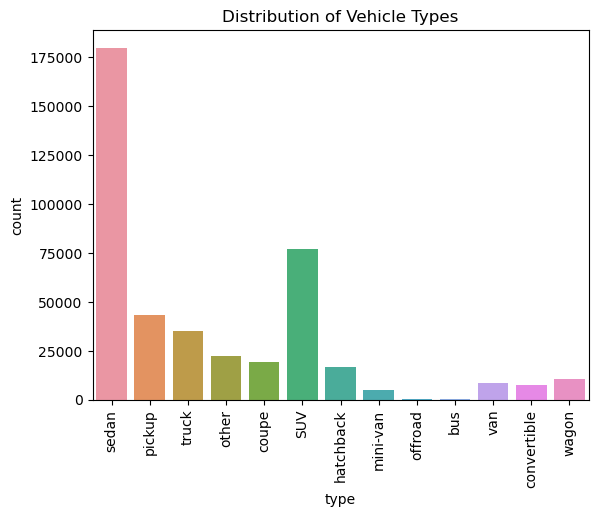

In [105]:
sns.countplot( x='type', data=df)
plt.title('Distribution of Vehicle Types')
plt.xticks(rotation=90)
plt.show()

### Which region have the highest number of vehicles listed ?

In [16]:
df['region'].value_counts().index[0:5]

Index(['columbus', 'jacksonville', 'spokane / coeur d'alene', 'eugene',
       'fresno / madera'],
      dtype='object', name='region')

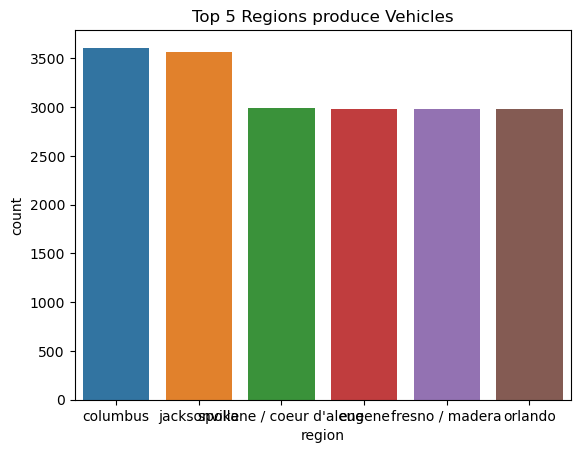

In [25]:
sns.countplot(x='region', data=df, order = df['region'].value_counts().index[0:6])
plt.title('Top 5 Regions produce Vehicles')
#plt.xticks(rotation =90)
plt.show()

### Which manufacturers have the most vehicles listed ?

In [33]:
df['manufacturer'].value_counts().index[0:5]

Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan'], dtype='object', name='manufacturer')

Text(0.5, 1.0, 'Top 10 Manufacturer')

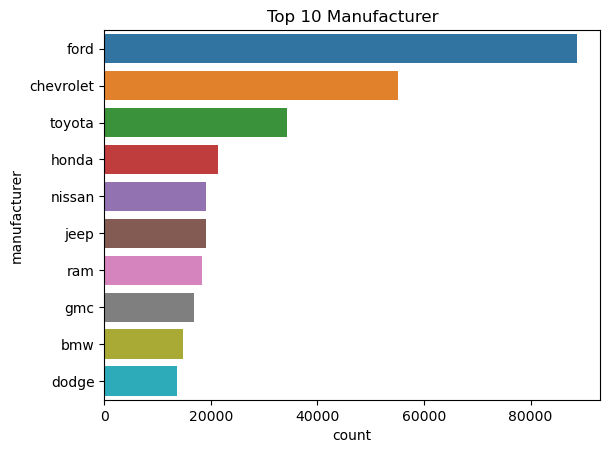

In [37]:
sns.countplot(y='manufacturer',data=df, order=df['manufacturer'].value_counts().index[0:10])
plt.title('Top 10 Manufacturer')

### How has the average price of vehicles changed over the years ?

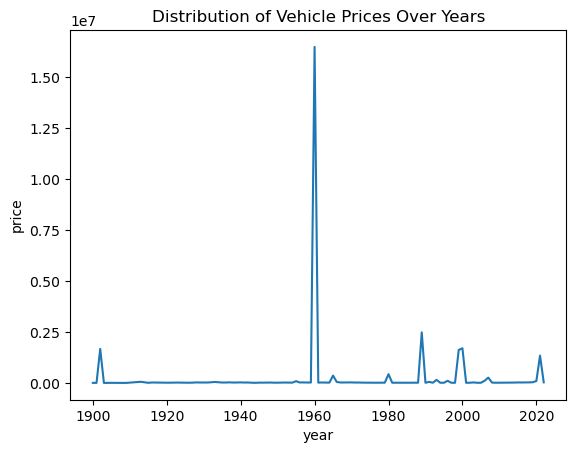

In [106]:
df.groupby('year')['price'].mean().plot(kind='line')
plt.title('Distribution of Vehicle Prices Over Years')
plt.ylabel('price')
plt.show()

### How does the number of cylinders affect the price of vehicles ?

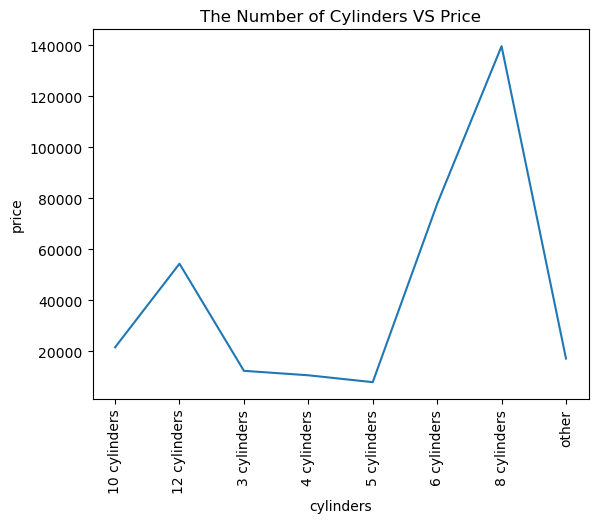

In [78]:
df.groupby(['cylinders'])['price'].mean().plot(kind='line')
plt.title('The Number of Cylinders VS Price')
plt.xticks(rotation=90)
plt.ylabel('price')
plt.show()

### What is the most common fuel type for vehicles in each region ?

In [96]:
df.groupby('region')['fuel'].agg(lambda x: x.value_counts().index[0:3])

region
SF bay area               [gas, other, diesel]
abilene                   [gas, diesel, other]
akron / canton            [gas, other, diesel]
albany                    [gas, other, diesel]
albuquerque               [gas, other, diesel]
                                  ...         
york                      [gas, other, diesel]
youngstown                [gas, other, diesel]
yuba-sutter               [gas, other, diesel]
yuma                      [gas, other, diesel]
zanesville / cambridge    [gas, other, diesel]
Name: fuel, Length: 404, dtype: object

### How does the odometer reading correlate with the price of vehicles ?

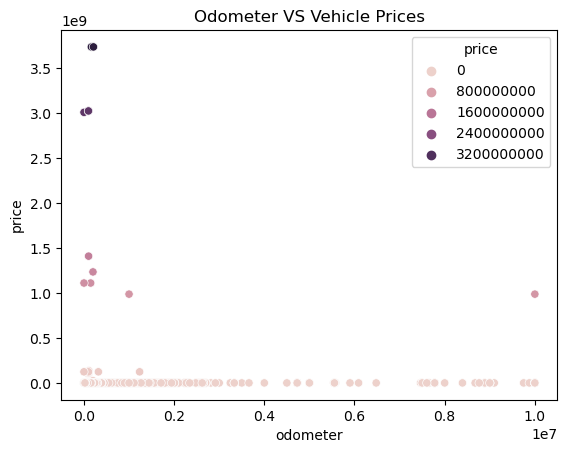

In [86]:
sns.scatterplot(x='odometer',y='price',hue='price',data=df)
plt.title('Odometer VS Vehicle Prices')
plt.show()

### What are the most common title statuses for vehicles in different states ?

In [93]:
df.groupby('state')['title_status'].agg(lambda x: x.value_counts().index[0:5])

state
ak          [clean, rebuilt, lien, salvage, missing]
al          [clean, rebuilt, lien, missing, salvage]
ar          [clean, rebuilt, salvage, missing, lien]
az          [clean, rebuilt, salvage, lien, missing]
ca          [clean, salvage, rebuilt, missing, lien]
co          [clean, rebuilt, salvage, lien, missing]
ct          [clean, rebuilt, missing, salvage, lien]
dc          [clean, rebuilt, salvage, missing, lien]
de          [clean, rebuilt, lien, missing, salvage]
fl          [clean, rebuilt, lien, salvage, missing]
ga          [clean, rebuilt, lien, missing, salvage]
hi          [clean, rebuilt, salvage, lien, missing]
ia          [clean, rebuilt, salvage, lien, missing]
id          [clean, rebuilt, salvage, lien, missing]
il          [clean, rebuilt, lien, salvage, missing]
in          [clean, rebuilt, lien, salvage, missing]
ks          [clean, rebuilt, salvage, lien, missing]
ky          [clean, rebuilt, salvage, lien, missing]
la          [clean, rebuilt, salvage, li

### How does the paint color of vehicles affect their price ?

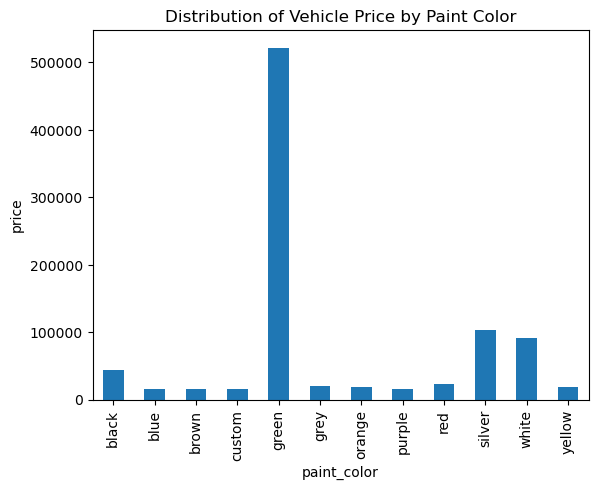

In [107]:
df.groupby('paint_color')['price'].mean().plot(kind='bar',)
plt.title('Distribution of Vehicle Price by Paint Color')
plt.ylabel('price')
plt.show()

### What are the most common vehicle sizes ?

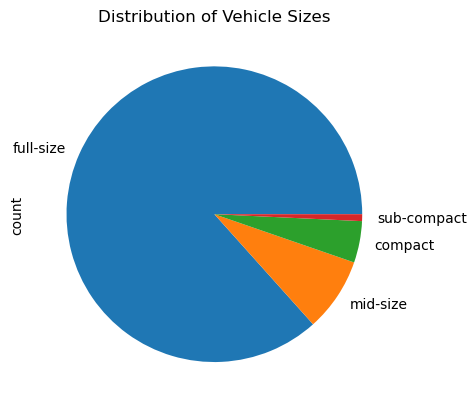

In [108]:
df['size'].value_counts().plot(kind='pie')
plt.title('Distribution of Vehicle Sizes')
plt.show()

### How many years old are the vehicles listed ?

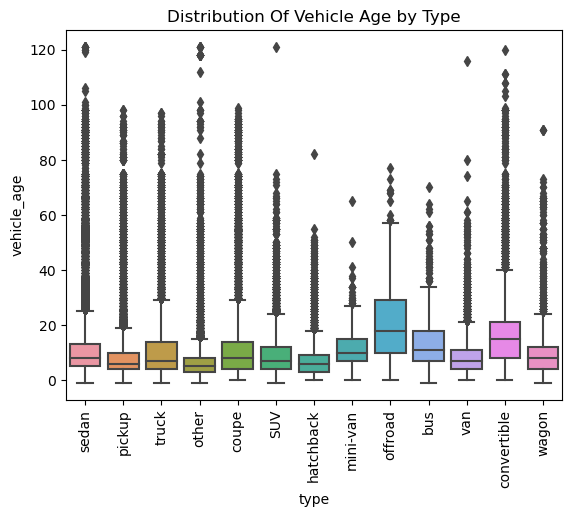

In [104]:
df['vehicle_age'] = df['posting_date'].dt.year - df['year']
sns.boxplot(x='type',y='vehicle_age',data=df)
plt.title('Distribution Of Vehicle Age by Type')
plt.xticks(rotation=90)
plt.show()